# Twitter

### Pre-processing

TODO
- none

Find the most recent dataset and load it

In [1]:
import pandas as pd
import numpy as np
import os

path = "data"

# get the most recent dataset (ordered by the date in the name)
filelist = os.listdir("data") # get the list of files
matching = [s for s in filelist if "dataset" in s] # filter only by files containing "dataset" in the name
matching.sort(reverse=True)

print(matching[0])

# load the dataset
df = pd.read_csv(path+"/"+matching[0])
display(df)

dataset_17:19:41_22-12-2022.csv


,Unnamed: 0,X,y
0,0,Claudia makes dishonesty her trademark. https:...,1
1,1,@autumnbueno @alexbruesewitz @PapiTrumpo THAT'...,1
2,2,I used to have a nice amount in my IRA after 4...,1
3,3,@CryptoNinjaco @Starinne @DC_Draino @KariLake ...,1
4,4,https://t.co/ITCjqOVvle EXCLUSIVE: National ...,1
...,...,...,...
2995,995,Have a scary right and get connect your really...,2
2996,996,A good name is earlier y p x #推特买粉 IE R I Ll...,2
2997,997,have a good sleep mark&lt;3 https://t.co/ySxW9...,2
2998,998,RT @anumeet_insan: @ThathSingh777 @Gurmeetramr...,2


#### Clean
Drop duplicates observations

In [2]:
# drop duplicates observations, keeping the first occurrence
df = df.drop_duplicates(subset='X', keep='first', inplace=False)

### Training Test Split

In [3]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,'X'], df.loc[:,'y'], test_size=0.2, random_state=0, shuffle=True)

#### Stemming
We can further improve our bag-of-words pre-processing using a normalization technique called stemming.
The idea is to reduce each word to its stem, using the stemming algorithm (rule-based heuristic).
For example a stemmer reduce words like "climber", "climbed" and "climbing" to "climb".

The Natural Language Toolkit for Python (NLTK, http://www.nltk.org) implements the Snowball stemming algorithm.

#### Bag-of-Words

Is used the scikit-learn implementation of bag of word using the CountVectorizer class.
It take an array of text as input and return a bag-of-words model.

##### Less frequently words
To lower the dimension we can clean the words that appears less frequently, is used the "min_df" to set the minimum number of documents that the word needs to appear in.



In [4]:
'''
# Apply advance tokenization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# create a function to 
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

tokenizer_snowballStemmer("The pink sweater fit her perfectly") # test

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(tokenizer = tokenizer_snowballStemmer, min_df=5) # use tokenizer function
count.fit(X_train) # generate Bag-of-words

#print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
#print("Vocabulary content:\n {}".format(count.vocabulary_))

# apply transformation to the data
X_train = count.transform(X_train)
print("X_train: {}".format(X_train.shape))

X_test = count.transform(X_test)
print("X_test: {}".format(X_test.shape))
'''

'\n# Apply advance tokenization\nfrom nltk.stem.snowball import SnowballStemmer\nstemmer = SnowballStemmer("english")\n\n# create a function to \ndef tokenizer_snowballStemmer(text):\n    return [stemmer.stem(word) for word in text.split()]\n\ntokenizer_snowballStemmer("The pink sweater fit her perfectly") # test\n\nfrom sklearn.feature_extraction.text import CountVectorizer\ncount = CountVectorizer(tokenizer = tokenizer_snowballStemmer, min_df=5) # use tokenizer function\ncount.fit(X_train) # generate Bag-of-words\n\n#print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))\n#print("Vocabulary content:\n {}".format(count.vocabulary_))\n\n# apply transformation to the data\nX_train = count.transform(X_train)\nprint("X_train: {}".format(X_train.shape))\n\nX_test = count.transform(X_test)\nprint("X_test: {}".format(X_test.shape))\n'

Better use TF-IDF

REFs 
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [5]:
# Apply advance tokenization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# create a function to 
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

vectorizer = TfidfVectorizer(
    tokenizer = tokenizer_snowballStemmer,
    max_df=0.5,
    min_df=5,
    stop_words="english")

t0 = time()
vectorizer.fit(X_train)
X_train_1 = vectorizer.transform(X_train)
print(f"vectorization done in {time() - t0:.3f} s")

print(f"n_samples: {X_train_1.shape[0]}, n_features: {X_train_1.shape[1]}")
print(f"{X_train_1.nnz / np.prod(X_train_1.shape):.3f}")

#print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
#print("Vocabulary content:\n {}".format(vectorizer.vocabulary_))

# apply transformation to the tesr
X_test_1 = vectorizer.transform(X_test)
print("X_test: {}".format(X_test_1.shape))


feature_names = np.array(vectorizer.get_feature_names())
target_names = [0, 1 , 2]

display(target_names)

/Users/agustin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/agustin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc'

vectorization done in 0.803 s
n_samples: 2332, n_features: 1067
0.006
X_test: (583, 1067)


[0, 1, 2]

In [6]:
# update the variables
X_train = X_train_1
X_test = X_test_1

### Modeling

In [7]:
from sklearn.ensemble import RandomForestClassifier

# fit a Random Forest model
clf_forest = RandomForestClassifier(n_estimators=100)

Check the model performance using cross validation (on the training set) and show the accuracy results.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# plot CV results
scores = cross_val_score(clf_forest, X_train, y_train, cv=5, scoring='accuracy')
display("Cross Validation scores")
i=1
for a in scores:
    display("Accuracy cv=" + str(i) + ": " + str(round(a*100, 2)))
    i = i+1

display("Accuracy MEAN: "+str(round(scores.mean(),2)*100))

'Cross Validation scores'

'Accuracy cv=1: 90.36'

'Accuracy cv=2: 89.72'

'Accuracy cv=3: 89.06'

'Accuracy cv=4: 89.27'

'Accuracy cv=5: 90.99'

'Accuracy MEAN: 90.0'

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf_forest = clf_forest.fit(X_train, y_train)

# results on test set
predictions = clf_forest.predict(X_test)
test_accuracy = accuracy_score(predictions, y_test)
display("Test set accuracy: " + str(round(test_accuracy*100, 2)))

display(confusion_matrix(predictions, y_test)) # display confusion matrix

'Test set accuracy: 88.51'

array([[159,   0,   1],
       [  1, 192,  21],
       [ 21,  23, 165]])

### plot feature effect

top 5 keywords per class:
                  0                 1      2
0         @undisput          @karilak     rt
1              @fs1  @karilakewarroom   good
2  @realskipbayless            inflat  littl
3               fs1    @gregabbott_tx    big
4              skip              lake    i'm


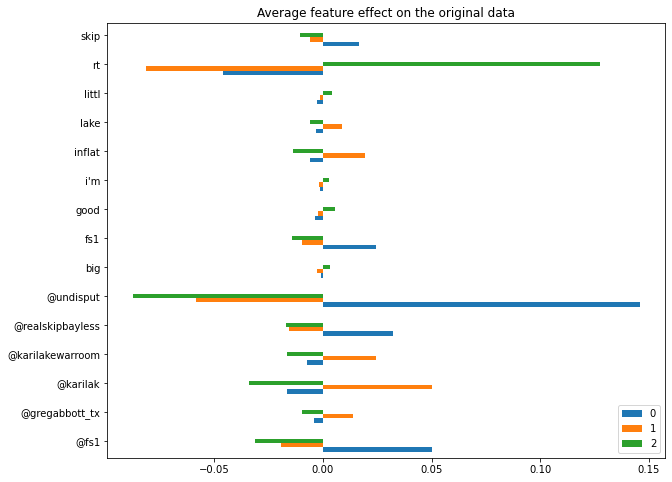

In [10]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)

def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()
    

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

For random forest

Elapsed time to compute the importances: 0.019 seconds


@undisput           0.130474
@realskipbayless    0.068763
@karilak            0.051271
@fs1                0.045820
fs1                 0.027365
@karilakewarroom    0.022976
inflat              0.019611
skip                0.015102
@bloggingtheboy     0.014085
dtype: float64

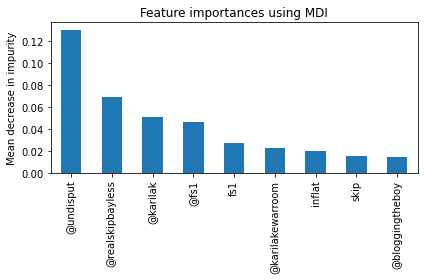

In [53]:
import time

start_time = time.time()
importances = clf_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances.iloc[1:10]
display(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(
    #yerr=std,
    ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Benchmarking classifier

In [ ]:
from sklearn.utils.extmath import density
from sklearn import metrics


def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

In [ ]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time)
test_time = np.array(test_time)

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))

In [71]:
for i in range(1,3):
    print((i-1)*100)
    print((i*100)-1)
    print("SS")
    
    
followers = pd.DataFrame()
f = pd.DataFrame({1, 2, 3})
followers = pd.concat([followers, f])
followers = pd.concat([followers, f])


display(followers)

0
99
SS
100
199
SS


,0
0,1
1,2
2,3
0,1
1,2
2,3
